<h1 style='color:blue' align='center'>Final Lab (Mattiallah (030) )</h1>

<h2 style='color:blue' align='center'>Image Classification Using Convolutional Neural Network (CNN)</h2>

<h3 style="color:blue">Installing tensorflow</h3>

In [1]:
pip install tensorflow

<h3 style="color:Blue">Importing Some Dep... and Libraries</h3>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


<h3 style="color:Blue">Selecting The Dataset (cifar10)</h3>

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 487s 3us/step


(50000, 32, 32, 3)

<h3 style="color:Blue">Data PreProcessing</h3>

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

<h3 style="color:Blue">Plotting Some images</h3>

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

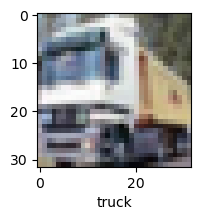

In [11]:
plot_sample(X_train, y_train, 1)

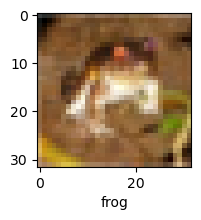

In [12]:
plot_sample(X_train, y_train, 0)

<h3 style="color:blue">Normalizing the training data and test data to take value from 0 to 1</h3>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h3 style="color:blue">CNN Model Architecture</h3>

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

<h3 style="color:blue">Training the model using an appropriate optimization algorithm (Adam)</h3>

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


1563/1563 [==============================] - 80s 46ms/step - loss: 1.4390 - accuracy: 0.4856
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1080 - accuracy: 0.6139
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9880 - accuracy: 0.6565
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9087 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8416 - accuracy: 0.7093
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7826 - accuracy: 0.7276
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7316 - accuracy: 0.7447
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6849 - accuracy: 0.7606
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6387 - accuracy: 0.7776
Epoch 10/10
1563/1563 [==============================] - 69s 4

<h3 style="color:blue">Evaluation</h3>

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 10s 28ms/step - loss: 0.9721 - accuracy: 0.6899


[0.9720948338508606, 0.6898999810218811]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 9s 24ms/step


array([[2.73192214e-04, 4.55415284e-04, 9.67352418e-04, 4.82679546e-01,
        6.18458772e-03, 4.99432087e-01, 7.73901492e-03, 1.53006159e-03,
        4.44795587e-04, 2.93955207e-04],
       [1.17904798e-03, 9.49557543e-01, 1.75480849e-07, 1.21809345e-08,
        6.65743771e-09, 2.31186820e-10, 3.24022809e-09, 5.74300940e-10,
        4.79561202e-02, 1.30705233e-03],
       [6.01026490e-02, 4.09950912e-01, 3.55396117e-03, 7.60906935e-03,
        1.47070992e-03, 1.25773414e-03, 7.40233460e-04, 2.23109289e-03,
        4.27458316e-01, 8.56253281e-02],
       [8.51190925e-01, 5.82130346e-03, 4.06533014e-03, 1.47475395e-04,
        1.71658695e-02, 1.37645384e-05, 2.63961865e-05, 1.39893760e-04,
        1.19640112e-01, 1.78900792e-03],
       [8.42561292e-07, 1.91162253e-05, 9.99686425e-04, 1.26241650e-02,
        8.26417744e-01, 3.35640833e-03, 1.56525388e-01, 4.20135366e-05,
        1.03804523e-05, 4.20605102e-06]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 1, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

<h3 style="color:blue">CLassifying</h3>

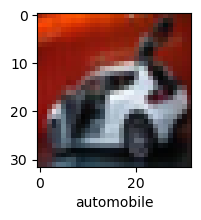

In [24]:
plot_sample(X_test, y_test,6)

<h3 style="color:blue">Confirming</h3>

In [25]:
classes[y_classes[6]]

'automobile'

<h3 style="color:blue">Another</h3>

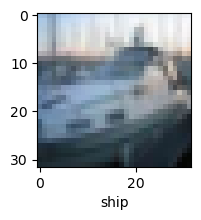

In [29]:
plot_sample(X_test, y_test,2)

<h3 style="color:blue">Confirming</h3>

In [30]:
classes[y_classes[2]]

'ship'